In [168]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


df=pd.read_csv("price_smp.csv")
data2 = np.loadtxt("price_smp.csv",encoding='latin-1', delimiter=',', skiprows=1, usecols=(8, 9, 10), dtype=float)
df.head()

,day,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [169]:
feats= ['day','8','9','10']
df[feats].head()


,day,8,9,10
0,1/01/2021,964.4,964.4,964.4
1,1/02/2021,1019.7,1019.7,1019.7
2,1/03/2021,988.4,988.4,988.4
3,1/04/2021,1002.0,1002.1,1002.1
4,1/05/2021,1061.5,1061.5,1061.5


In [170]:
df[feats].describe()

,8,9,10
count,365.000000,365.000000,365.000000
mean,1040.228219,1040.278082,1040.277808
std,105.147104,105.152979,105.153179
min,885.700000,885.700000,885.700000
25%,988.400000,988.400000,988.400000
50%,1022.600000,1022.600000,1022.600000
75%,1061.500000,1061.500000,1061.500000
max,1565.500000,1565.500000,1565.500000


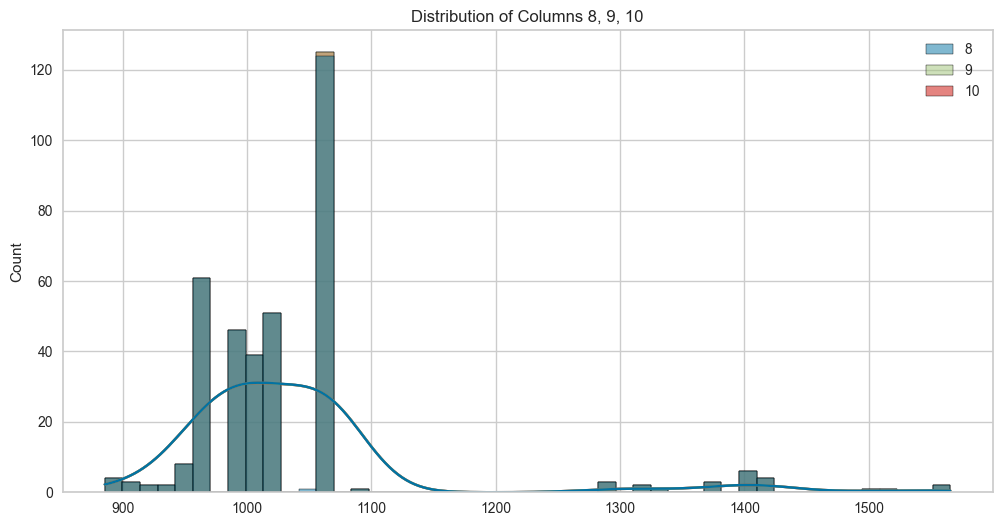

In [171]:
plt.figure(figsize=(12, 6))
sns.histplot(df[feats], kde=True)
# sns.histplot(df['Column8'], kde=True, label='Column8')
# sns.histplot(df['Column9'], kde=True, label='Column9')
# plt.legend()
plt.title('Distribution of Columns 8, 9, 10')
plt.show()

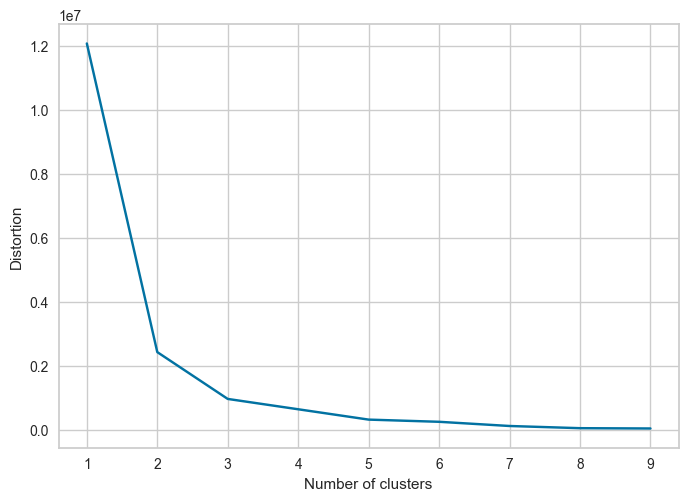

In [172]:
ck_new = df.iloc[:,[8,9,10]]
ck_new.head()
wcss = [] 
for i in range(1,10): 
     kmeans = KMeans(n_clusters = i )
     kmeans.fit(ck_new.values.reshape(-1,1)) 
     wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion') 
plt.show()

In [173]:
kmeans = KMeans(n_clusters = 5 )
kmeans.fit(ck_new.values.reshape(-1,1))
test_labels = kmeans.predict(ck_new.values.reshape(-1,1))
print(test_labels)

[2 2 2 ... 0 0 0]


Iteration 1:
Centers: [[1005.5504902 ]
 [1538.55      ]
 [1373.36842105]
 [1065.36375661]
 [ 955.70625   ]]
Labels: [4 4 4 ... 0 0 0]




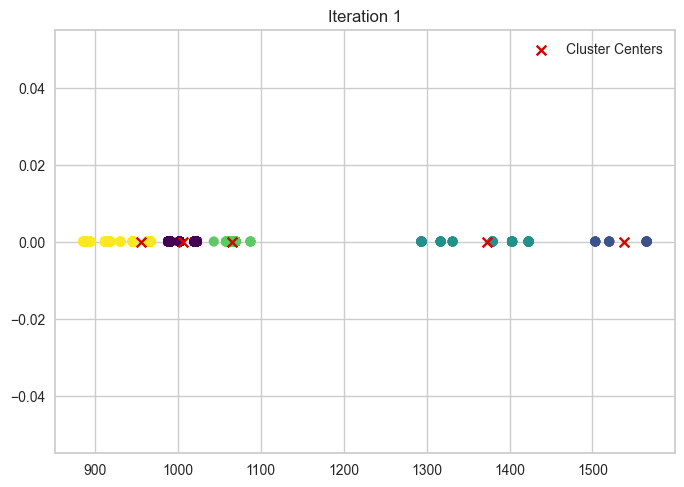

Iteration 2:
Centers: [[1005.5504902 ]
 [1402.09565217]
 [1065.36375661]
 [ 908.35454545]
 [ 963.25507246]]
Labels: [4 4 4 ... 0 0 0]




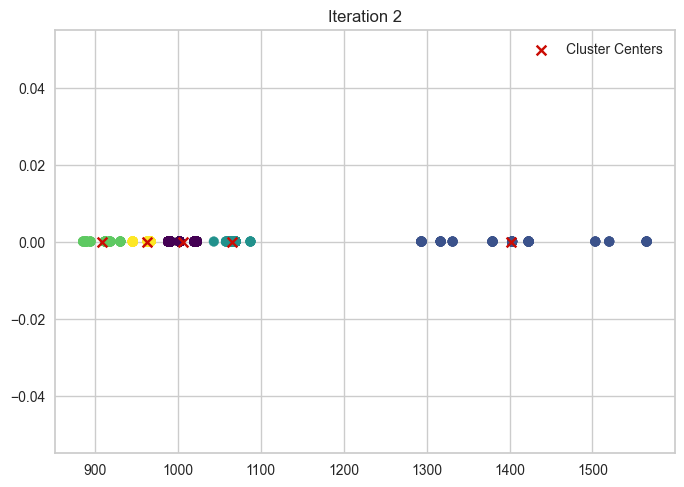

Iteration 3:
Centers: [[1435.42352941]
 [1013.48851852]
 [ 968.23333333]
 [1065.36375661]
 [1307.66666667]]
Labels: [2 2 2 ... 1 1 1]




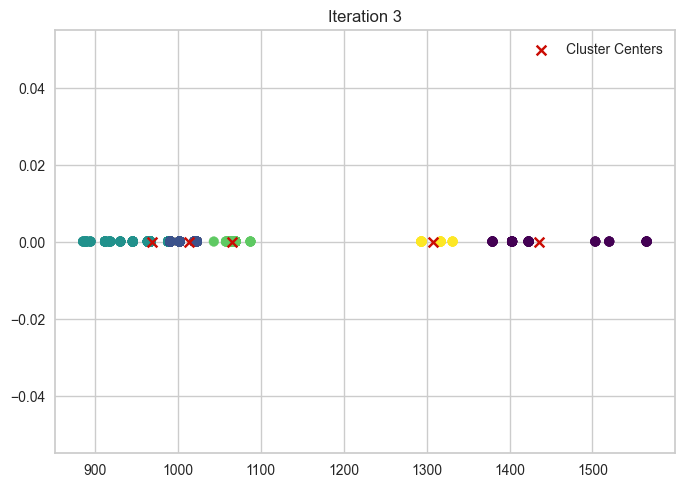

Iteration 4:
Centers: [[1005.5504902 ]
 [1538.55      ]
 [1373.36842105]
 [1065.36375661]
 [ 955.70625   ]]
Labels: [4 4 4 ... 0 0 0]




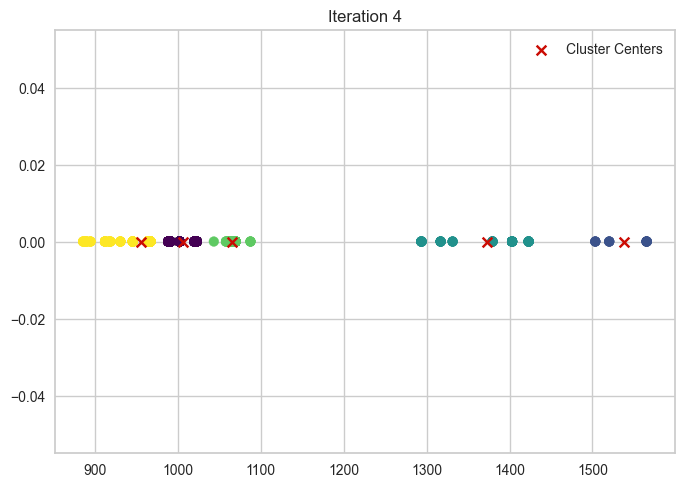

Iteration 5:
Centers: [[1013.48851852]
 [1373.36842105]
 [ 968.23333333]
 [1065.36375661]
 [1538.55      ]]
Labels: [2 2 2 ... 0 0 0]




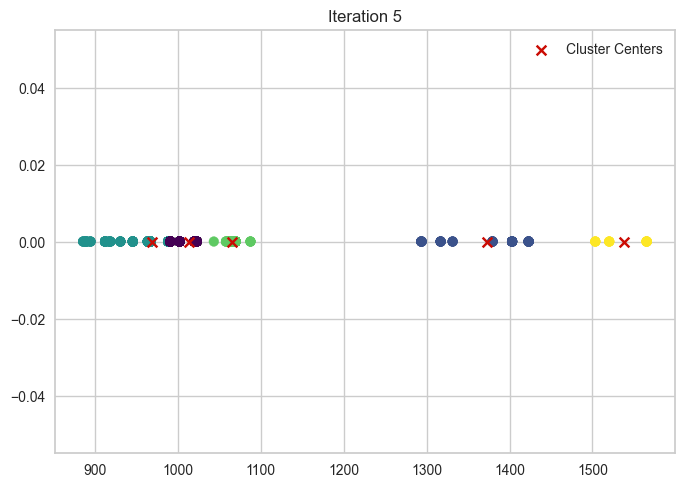

Final centers: [[1013.48851852]
 [1373.36842105]
 [ 968.23333333]
 [1065.36375661]
 [1538.55      ]]
Final labels: [2 2 2 ... 0 0 0]


In [174]:
# Khởi tạo mô hình KMeans với số cụm là 5
kmeans = KMeans(n_clusters=5, init='k-means++' )

# Huấn luyện mô hình
for i in range(5):   
    kmeans.fit(ck_new.values.reshape(-1,1))
    print(f"Iteration {i+1}:")
    print("Centers:", kmeans.cluster_centers_)
    print("Labels:", kmeans.labels_)
    print("\n")

    # Vẽ biểu đồ trung tâm cụm và dữ liệu
    # plt.figure()
    # plt.scatter(ck_new, np.zeros_like(ck_new), c=kmeans.labels_, cmap='viridis')
    # plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), marker='x', c='r', label='Cluster Centers')
    # plt.title(f"Iteration {i+1}")
    # plt.legend()
    # plt.show()
    plt.figure()
    plt.scatter(ck_new, np.zeros_like(ck_new), c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), marker='x', c='r', label='Cluster Centers')
    plt.title(f"Iteration {i+1}")
    plt.legend()
    plt.show(block=False)  # Setting block=False to avoid the KeyboardInterrupt
    plt.pause(1)

# Kết quả cuối cùng
print("Final centers:", kmeans.cluster_centers_)
print("Final labels:", kmeans.labels_)

In [175]:
gmm = GaussianMixture(n_components = 5) 
gmm.fit(ck_new.values.reshape(-1,1)) 
test_labels = gmm.predict(ck_new.values.reshape(-1,1))
print(test_labels)

[4 4 4 ... 0 0 0]


Labels after 1 iterations: [2 2 2 ... 3 3 3]
Cluster centers after 1 iterations: [[1065.24930837]
 [1375.12702059]
 [ 973.76541942]
 [1007.22069148]
 [1540.60922708]]
Labels after 2 iterations: [3 3 3 ... 2 2 2]
Cluster centers after 2 iterations: [[1065.25015068]
 [1424.09995849]
 [1005.541487  ]
 [ 973.5556383 ]
 [1303.46969085]]
Labels after 3 iterations: [4 4 4 ... 0 0 0]
Cluster centers after 3 iterations: [[1005.54431627]
 [1388.83641979]
 [1065.24564229]
 [ 925.44088738]
 [ 965.58833358]]
Labels after 4 iterations: [0 0 0 ... 0 0 0]
Cluster centers after 4 iterations: [[ 992.20252567]
 [1304.39636158]
 [1065.25564319]
 [1425.64011749]
 [ 919.25695622]]
Labels after 5 iterations: [4 4 4 ... 0 0 0]
Cluster centers after 5 iterations: [[1012.19360966]
 [1388.83609592]
 [ 907.19606323]
 [1065.24549108]
 [ 975.32212202]]
Labels after 6 iterations: [2 2 2 ... 2 2 2]
Cluster centers after 6 iterations: [[1065.25578922]
 [1375.12895113]
 [ 991.74105402]
 [ 909.18091407]
 [1540.61154565]

ValueError: 'c' argument has 365 elements, which is inconsistent with 'x' and 'y' with size 1095.

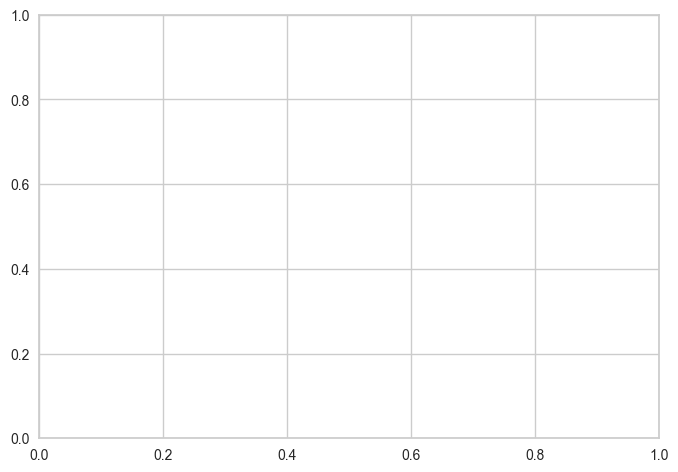

In [181]:
# Khởi tạo mô hình KMeans với số cụm là 5
gmm = GaussianMixture(n_components = 5)
gmm.fit(ck_new.values.reshape(-1,1))
# In các nhãn và các tâm cụm sau mỗi vòng lặp
for i in range(1, 11):  # 10 vòng lặp
    gmm.n_init = i  # Đặt số lượng vòng lặp cho việc khởi tạo ngẫu nhiên mô hình
    gmm.fit(ck_new.values.reshape(-1,1))
    
    # In các nhãn sau mỗi vòng lặp
    labels = gmm.predict(ck_new.values.reshape(-1,1))
    print(f"Labels after {i} iterations:", labels)
    
    # In các tâm cụm sau mỗi vòng lặp
    means = gmm.means_
    print(f"Cluster centers after {i} iterations:", means)

for i in range(1, 11):  # 10 vòng lặp
    gmm.n_init = i  # Đặt số lượng vòng lặp cho việc khởi tạo ngẫu nhiên mô hình
    gmm.fit(ck_new)
    
    # In các nhãn sau mỗi vòng lặp
    labels = gmm.predict(ck_new)
    print(f"Labels after {i} iterations_GaussianMixture:", labels)
    
    # In các tâm cụm sau mỗi vòng lặp
    means = gmm.means_
    print(f"Cluster centers after {i} iterations:", means)
    
    # Vẽ biểu đồ trung tâm cụm và dữ liệu
    plt.figure()
    plt.scatter(ck_new, np.zeros_like(ck_new), c=labels, cmap='viridis')
    plt.scatter(means, np.zeros_like(means), marker='x', c='r', label='Cluster Centers')
    plt.title(f"Iteration_GaussianMixture {i}")
    plt.legend()
    plt.show() 


# for i in range(1, 11):  # 10 vòng lặp
#     gmm.n_init = i  # Đặt số lượng vòng lặp cho việc khởi tạo ngẫu nhiên mô hình
#     gmm.fit(ck_new)
    
#     # In các nhãn sau mỗi vòng lặp
#     labels = gmm.predict(ck_new)
#     print(f"Labels after {i} iterations:", labels)
    
#     # In các tâm cụm sau mỗi vòng lặp
#     means = gmm.means_
#     print(f"Cluster centers after {i} iterations:", means)
    
#     # Vẽ biểu đồ trung tâm cụm và dữ liệu
#     plt.figure()
#     plt.scatter(ck_new, np.zeros_like(ck_new), c=labels, cmap='viridis', s=50)  # Set s to ensure proper visualization
#     plt.scatter(means, np.zeros_like(means), marker='x', c='r', label='Cluster Centers')
#     plt.title(f"Iteration {i}")
#     plt.legend()
#     plt.show()

In [ ]:
rolling_mean_8 = df['8'].rolling(window=10).mean()
rolling_mean_9 = df['9'].rolling(window=10).mean()
rolling_mean_10 = df['10'].rolling(window=10).mean()

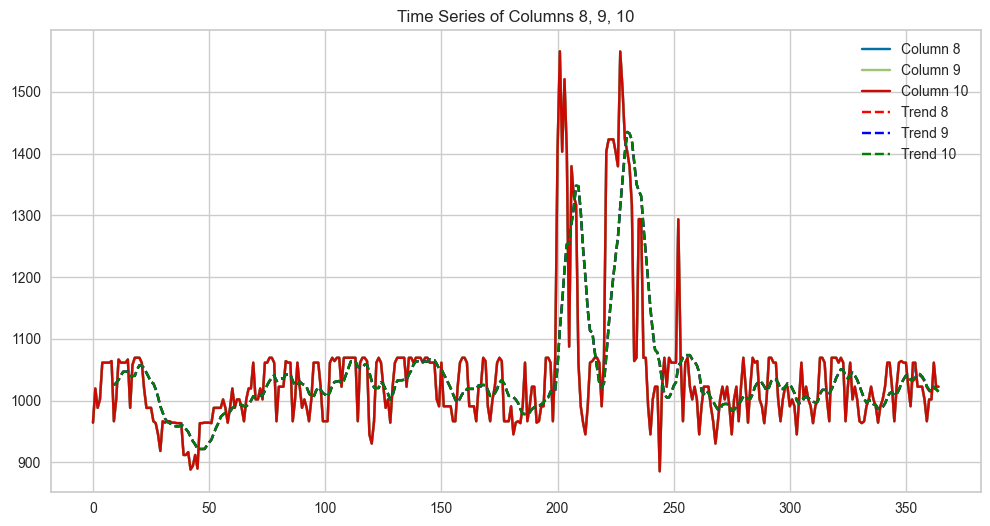

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['8'], label='Column 8')
plt.plot(df['9'], label='Column 9')
plt.plot(df['10'], label='Column 10')

plt.plot(rolling_mean_8, label='Trend 8', linestyle='--', color='red')
plt.plot(rolling_mean_9, label='Trend 9', linestyle='--', color='blue')
plt.plot(rolling_mean_10, label='Trend 10', linestyle='--', color='green')
plt.legend()
plt.title('Time Series of Columns 8, 9, 10')
plt.show()

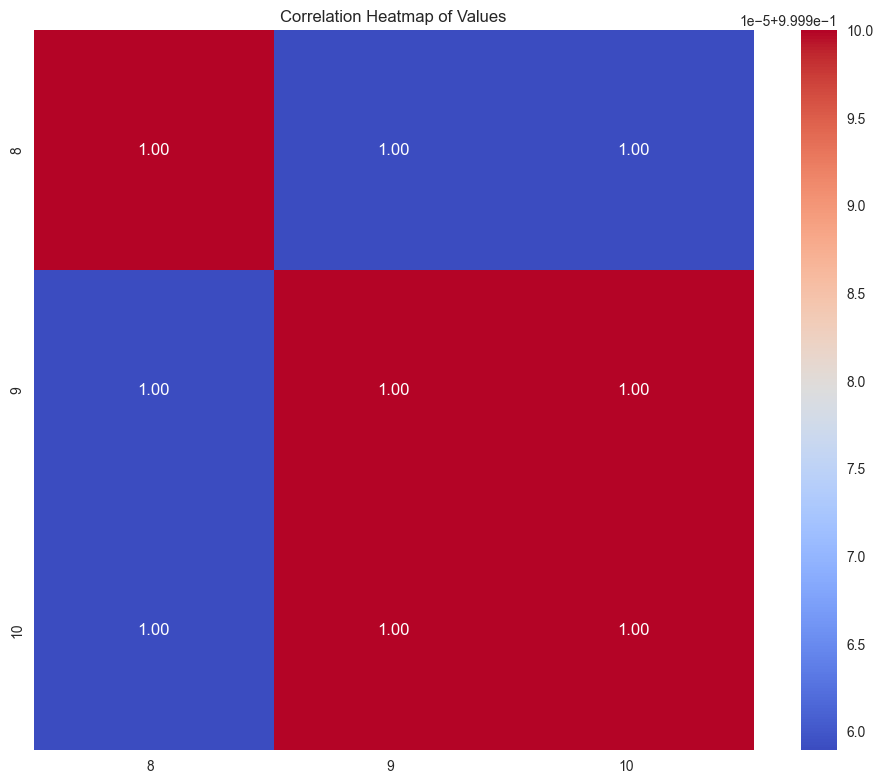

In [ ]:
# Calculate the correlation matrix
 
corr = df[['8','9','10']].corr()

# Generate a heatmap
plt.figure(figsize=(10,8), facecolor='white')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Values')
plt.xticks( ha='right')
plt.yticks()
plt.tight_layout()
plt.show()

In [ ]:
# Khởi tạo biến trạng thái (state vector)
x = np.zeros((3, 1))  # 3 biến trạng thái tương ứng với 3 cột

# Ma trận hiệp phương sai của trạng thái (covariance matrix)
P = np.eye(3)

# Ma trận chuyển tiếp trạng thái (state transition matrix)
F = np.eye(3)

# Ma trận đo lường (measurement matrix)
H = np.eye(3)

# Hiệp phương sai của nhiễu quá trình (process noise covariance)
Q = np.eye(3) * 0.01

# Hiệp phương sai của nhiễu đo lường (measurement noise covariance)
R = np.eye(3) * 0.1

# Vector đo lường (measurement vector)
z = np.zeros((3, 1))

In [ ]:
def predict(x, P, F, Q):
    # Dự đoán trạng thái tiếp theo
    x = np.dot(F, x)
    P = np.dot(F, np.dot(P, F.T)) + Q
    return x, P

def update(x, P, z, H, R):
    # Tính toán các giá trị Kalman Gain
    y = z - np.dot(H, x)
    S = np.dot(H, np.dot(P, H.T)) + R
    K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))

    # Cập nhật trạng thái và hiệp phương sai
    x = x + np.dot(K, y)
    P = P - np.dot(K, np.dot(H, P))
    return x, P

In [ ]:
filtered_data2 = []

for measurement in data2:
    z = measurement.reshape(3, 1)  # Chuyển đổi đo lường thành vector cột

    # Dự đoán bước tiếp theo
    x, P = predict(x, P, F, Q)

    # Cập nhật với đo lường mới
    x, P = update(x, P, z, H, R)

    # Lưu trữ kết quả đã lọc
    filtered_data2.append(x.flatten())

filtered_data2 = np.array(filtered_data2)

In [ ]:
print(filtered_data2)

[[ 877.51711712  877.51711712  877.51711712]
 [ 948.95907665  948.95907665  948.95907665]
 [ 963.78734581  963.78734581  963.78734581]
 ...
 [1020.0304103  1020.31931566 1020.3193141 ]
 [1020.72460092 1020.9354567  1020.93545556]
 [1021.23125163 1021.38514341 1021.38514258]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

mse_kalman = mean_squared_error(data2, filtered_data2)
mae_kalman = mean_absolute_error(data2, filtered_data2)
rmse_kalman = np.sqrt(mse_kalman)

print("Kalman Filter - MSE:", mse_kalman)
print("Kalman Filter - MAE:", mae_kalman)
print("Kalman Filter - RMSE:", rmse_kalman)



Kalman Filter - MSE: 2795.053812090437
Kalman Filter - MAE: 32.42247967344536
Kalman Filter - RMSE: 52.86826848016149


In [ ]:
series = df.iloc[:, 9]

# Điền giá trị thiếu bằng phương pháp nội suy (interpolation)
series = series.interpolate(method='linear')

# Định nghĩa các tham số của mô hình SARIMA
order = (1, 1, 1)         # Tham số (p, d, q) cho phần không mùa
seasonal_order = (1, 1, 1, 12)  # Tham số (P, D, Q, s) cho phần mùa (s = 12 cho dữ liệu theo tháng)

# Xây dựng và huấn luyện mô hình SARIMA
model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# In kết quả huấn luyện
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  9   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1966.352
Date:                            Tue, 21 May 2024   AIC                           3942.704
Time:                                    11:33:34   BIC                           3962.022
Sample:                                         0   HQIC                          3950.392
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988     17.158      0.058      0.954     -32.631      34.628
ma.L1         -0.9994     31.136   

SARIMA - MSE: 7111.87486331269
SARIMA - MAE: 43.27108224631408
SARIMA - RMSE: 84.33193264305456


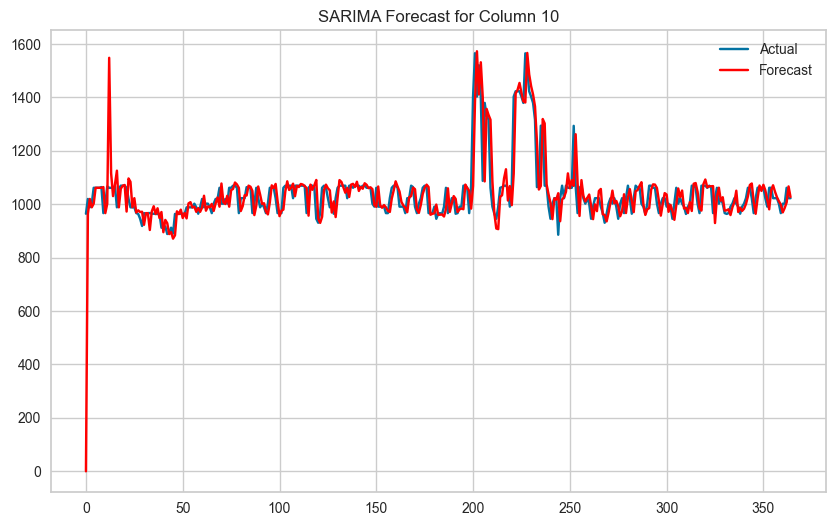

In [ ]:
# Dự đoán giá trị
n_forecast = len(series)
forecast = model_fit.predict(start=0, end=n_forecast-1)

# Tính toán độ đo lỗi
mse = mean_squared_error(series, forecast)
mae = mean_absolute_error(series, forecast)
rmse = np.sqrt(mse)

print("SARIMA - MSE:", mse)
print("SARIMA - MAE:", mae)
print("SARIMA - RMSE:", rmse)

# Vẽ biểu đồ kết quả dự đoán
plt.figure(figsize=(10, 6))
plt.plot(series, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast for Column 10')
plt.legend()
plt.show()